In [73]:
import os, sys
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# autocorrelation
import statsmodels.api as sm

In [74]:
dataset = pd.read_csv('datasets/Beer Australia.csv')
dataset

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


# Checking for Autocorrelation

In [75]:
sm.stats.durbin_watson(dataset['Monthly beer production'])

0.019486494992529867

- Since Durbin watson test value is between 0 and 2, it means it has positive autocorrelation.


In [76]:
dataset.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

- No missing values

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


- Dataset has 476 rows and 2 columns

In [78]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [79]:
dataset

,Month,Monthly beer production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9
...,...,...
471,1995-04-01,127.0
472,1995-05-01,151.0
473,1995-06-01,130.0
474,1995-07-01,119.0


In [80]:
# Setting month as a index variable to perform time series forecasting

dataset.set_index('Month', inplace=True)

In [81]:
dataset

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1995-04-01,127.0
1995-05-01,151.0
1995-06-01,130.0


# Plotting graph to visualize

<AxesSubplot:xlabel='Month'>

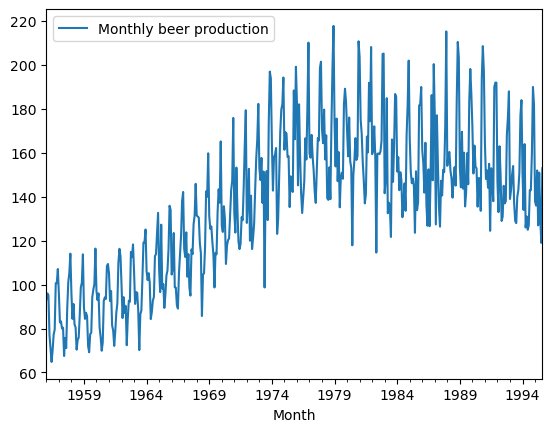

In [82]:
dataset.plot()

# To check the TSF component - we have to do Decomposition

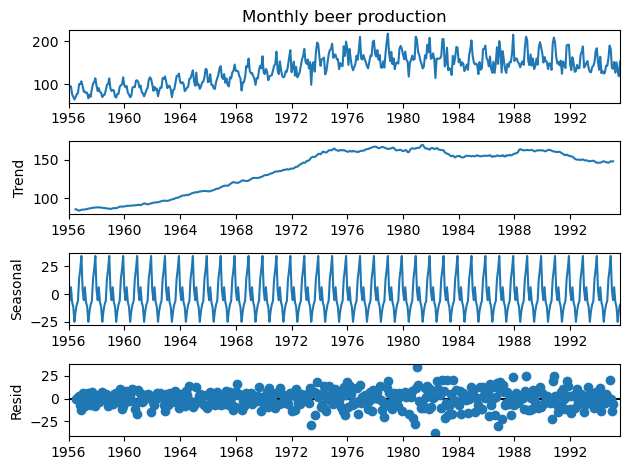

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(dataset['Monthly beer production'], period=12, model='additive')
decompose.plot()
plt.show()

# To check data is Stationary or not  - Augmented Dickey Fuller Test - Mandatory Steps

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
adfuller(dataset['Monthly beer production'])

(-2.282661418787579,
 0.17762099829132444,
 17,
 458,
 {'1%': -3.4447087976702284,
  '5%': -2.867871300049488,
  '10%': -2.5701423432047443},
 3463.9034375936567)

In [86]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("************Augmented Dickey Fuller Test************")
    labels = ['ADF Statistic Test', 'p-value', '#Lags', 'No of Observation']
    
    for a, b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary: Alternate Hypothesis is True")
    else:
        print("Weak evidence against null hypothesis and my timeseries is Non-Stationary: Alternate Hypothesis is False")   
    

In [87]:
adf_check(dataset['Monthly beer production'])

************Augmented Dickey Fuller Test************
ADF Statistic Test : -2.282661418787579
p-value : 0.17762099829132444
#Lags : 17
No of Observation : 458
Weak evidence against null hypothesis and my timeseries is Non-Stationary: Alternate Hypothesis is False


# We have to make our time series stationary first by using "Lag Function" and then only perform further steps

In [88]:
dataset['1st Diff'] = dataset['Monthly beer production'] - dataset['Monthly beer production'].shift(1)

In [89]:
dataset

,Monthly beer production,1st Diff
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,2.8
1956-03-01,95.2,-0.8
1956-04-01,77.1,-18.1
1956-05-01,70.9,-6.2
...,...,...
1995-04-01,127.0,-25.0
1995-05-01,151.0,24.0
1995-06-01,130.0,-21.0


In [90]:
adf_check(dataset['1st Diff'].dropna())

************Augmented Dickey Fuller Test************
ADF Statistic Test : -4.980663743064842
p-value : 2.4234117859955064e-05
#Lags : 18
No of Observation : 456
Strong evidence against null hypothesis and my timeseries is Stationary: Alternate Hypothesis is True


# Now data is stationary
- Strong evidence against null hypothesis and my timeseries is Stationary: Alternate Hypothesis is True

In [91]:
dataset['Seasonality'] = dataset['Monthly beer production'] - dataset['Monthly beer production'].shift(12)

In [92]:
dataset

,Monthly beer production,1st Diff,Seasonality
Month,,,
1956-01-01,93.2,NaN,NaN
1956-02-01,96.0,2.8,NaN
1956-03-01,95.2,-0.8,NaN
1956-04-01,77.1,-18.1,NaN
1956-05-01,70.9,-6.2,NaN
...,...,...,...
1995-04-01,127.0,-25.0,1.0
1995-05-01,151.0,24.0,20.0
1995-06-01,130.0,-21.0,5.0


In [93]:
adf_check(dataset['Seasonality'].dropna())

************Augmented Dickey Fuller Test************
ADF Statistic Test : -2.8967624777520093
p-value : 0.045725774623596185
#Lags : 17
No of Observation : 446
Strong evidence against null hypothesis and my timeseries is Stationary: Alternate Hypothesis is True


In [94]:
# Trend
# p = ?
# d = 1 # 1 number of lags
# q = ?

# Seasonality
# P = ?
# D = 1 # 1 number of lags
# Q = ?

In [95]:
# Visualize and find P/Q and p/q  (for both trend and seasonality)

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


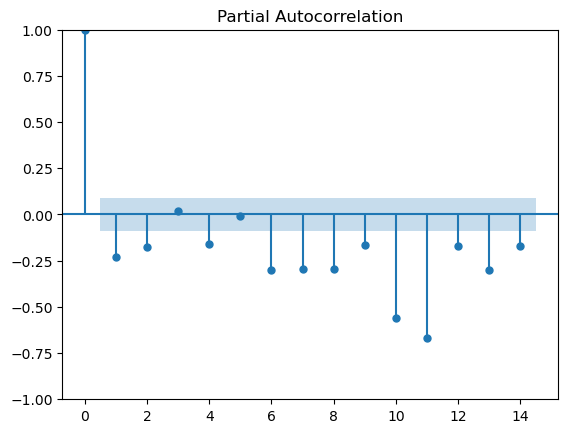

In [96]:
# Trend 
# p = 2
# d = 1
# q = 4

plot_pacf(dataset['1st Diff'].dropna(), lags=14)
plt.show()

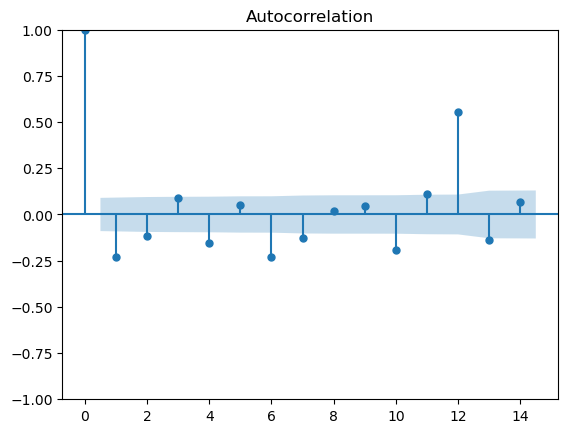

In [97]:
plot_acf(dataset['1st Diff'].dropna(), lags=14)
plt.show()

In [98]:
# Seasonality
# P = 3
# D = 1
# Q = 3

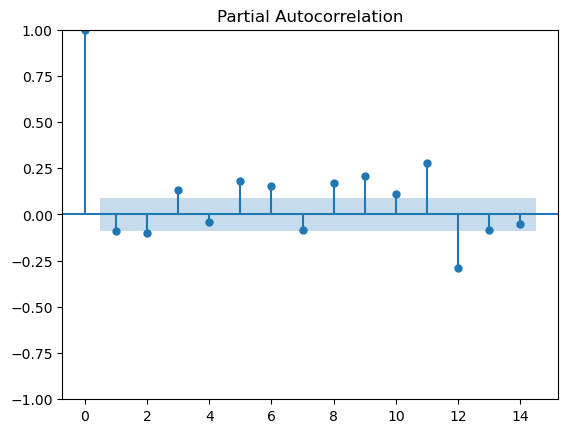

In [99]:
plot_pacf(dataset['Seasonality'].dropna(), lags=14)
plt.show()

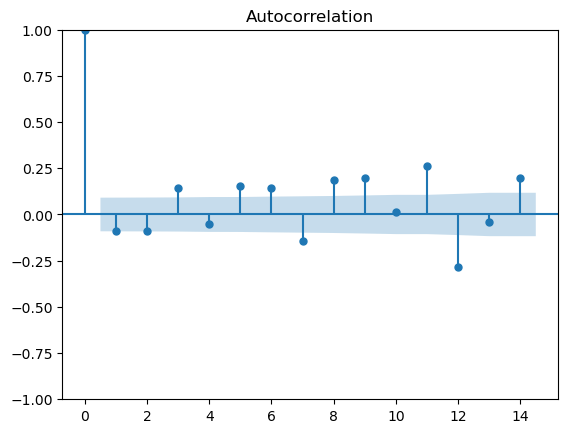

In [100]:
plot_acf(dataset['Seasonality'].dropna(), lags=14)
plt.show()

In [101]:
# Trend 
# p = 2
# d = 1
# q = 4


# Seasonality
# P = 3
# D = 1
# Q = 3

# Build ARIMA Model for Time Series Forecasting

In [102]:
from statsmodels.tsa.arima_model import ARIMA

In [103]:
model = sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],
                                 order=(2,1,4), seasonal_order=(3, 1, 3, 12))

/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [104]:
result = model.fit()

/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81753D+00    |proj g|=  3.67803D-01


 This problem is unconstrained.



At iterate    5    f=  3.62658D+00    |proj g|=  3.40938D-02

At iterate   10    f=  3.60063D+00    |proj g|=  4.90956D-02

At iterate   15    f=  3.57956D+00    |proj g|=  9.76285D-03

At iterate   20    f=  3.57849D+00    |proj g|=  7.19051D-03

At iterate   25    f=  3.57798D+00    |proj g|=  6.39719D-03

At iterate   30    f=  3.57444D+00    |proj g|=  2.83716D-02

At iterate   35    f=  3.56942D+00    |proj g|=  4.21670D-02

At iterate   40    f=  3.56601D+00    |proj g|=  2.38357D-02

At iterate   45    f=  3.56104D+00    |proj g|=  3.96632D-02


/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.55398D+00    |proj g|=  3.85904D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     62      1     0     0   3.859D-02   3.554D+00
  F =   3.5539817401955491     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [105]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  476
Model:             SARIMAX(2, 1, 4)x(3, 1, [1, 2, 3], 12)   Log Likelihood               -1691.695
Date:                                    Mon, 08 May 2023   AIC                           3409.391
Time:                                            17:45:26   BIC                           3463.181
Sample:                                        01-01-1956   HQIC                          3430.566
                                             - 08-01-1995                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4182      0.037    -37.818      0.000      -1.492      -1.345
ar.L2         -0.8742      0.036    -23.953      0.000      -0.946      -0.803
ma.L1          0.4225      0.048      8.869      0.000       0.329       0.516
ma.L2         -0.5286      0.049    -10.835      0.000      -0.624      -0.433
ma.L3         -0.6928      0.045    -15.397      0.000      -0.781      -0.605
ma.L4          0.1964      0.042      4.711      0.000       0.115       0.278
ar.S.L12       0.7133      0.109      6.565      0.000       0.500       0.926
ar.S.L24      -0.7920      0.116     -6.848      0.000      -1.019      -0.565
ar.S.L36      -0.1194      0.064     -1.877      0.061      -0.244       0.005
ma.S.L12      -1.4702      0.117    -12.532      0.000      -1.700      -1.240
ma.S.L24       1.3055      0.188      6.936      0.000       0.937       1.674
ma.S.L36      -0.5688      0.109     -5.199      0.000      -0.783      -0.354
sigma2        77.0322      4.019     19.167      0.000      69.155      84.909
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                36.56
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.45   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
# AIC	3409.391 : seasonal_order=(3, 1, 3, 12)

In [107]:
model = sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],
                                 order=(2,1,4), seasonal_order=(3, 1, 2, 12))
result = model.fit()
result.summary()

/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78156D+00    |proj g|=  3.40234D-01

At iterate    5    f=  3.62573D+00    |proj g|=  2.80532D-02

At iterate   10    f=  3.59489D+00    |proj g|=  8.77742D-02

At iterate   15    f=  3.58245D+00    |proj g|=  1.06738D-02

At iterate   20    f=  3.57881D+00    |proj g|=  4.06996D-03

At iterate   25    f=  3.57744D+00    |proj g|=  3.60382D-02

At iterate   30    f=  3.57677D+00    |proj g|=  3.27131D-03

At iterate   35    f=  3.57666D+00    |proj g|=  9.76470D-03

At iterate   40    f=  3.57641D+00    |proj g|=  2.03094D-03

At iterate   45    f=  3.57617D+00    |proj g|=  2.09192D-02


/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.57554D+00    |proj g|=  1.59442D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     57      1     0     0   1.594D-02   3.576D+00
  F =   3.5755366862337095     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                 Monthly beer production   No. Observations:                  476
Model:             SARIMAX(2, 1, 4)x(3, 1, [1, 2], 12)   Log Likelihood               -1701.955
Date:                                 Mon, 08 May 2023   AIC                           3427.911
Time:                                         17:45:34   BIC                           3477.564
Sample:                                     01-01-1956   HQIC                          3447.458
                                          - 08-01-1995                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4036      0.035    -39.930      0.000      -1.473      -1.335
ar.L2         -0.8841      0.035    -25.548      0.000      -0.952      -0.816
ma.L1          0.3663      0.048      7.654      0.000       0.273       0.460
ma.L2         -0.5587      0.050    -11.225      0.000      -0.656      -0.461
ma.L3         -0.6762      0.043    -15.707      0.000      -0.761      -0.592
ma.L4          0.2303      0.045      5.159      0.000       0.143       0.318
ar.S.L12       0.3683      0.248      1.486      0.137      -0.118       0.854
ar.S.L24      -0.2106      0.058     -3.622      0.000      -0.325      -0.097
ar.S.L36      -0.1483      0.072     -2.046      0.041      -0.290      -0.006
ma.S.L12      -1.0742      0.250     -4.299      0.000      -1.564      -0.585
ma.S.L24       0.3168      0.198      1.597      0.110      -0.072       0.706
sigma2        88.2242      4.779     18.463      0.000      78.858      97.590
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                37.85
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.46   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
# AIC	3427.911 : seasonal_order=(3, 1, 2, 12)

In [109]:
model = sm.tsa.statespace.SARIMAX(dataset['Monthly beer production'],
                                 order=(2,1,4), seasonal_order=(3, 1, 1, 12))
result = model.fit()
result.summary()

/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77015D+00    |proj g|=  3.38905D-01

At iterate    5    f=  3.62586D+00    |proj g|=  2.76192D-02

At iterate   10    f=  3.58918D+00    |proj g|=  4.59407D-02

At iterate   15    f=  3.58459D+00    |proj g|=  1.71964D-02

At iterate   20    f=  3.57932D+00    |proj g|=  8.76962D-03

At iterate   25    f=  3.57904D+00    |proj g|=  1.46596D-02

At iterate   30    f=  3.57802D+00    |proj g|=  2.48827D-02

At iterate   35    f=  3.57620D+00    |proj g|=  1.32722D-02

At iterate   40    f=  3.56194D+00    |proj g|=  4.63368D-01

At iterate   45    f=  3.55403D+00    |proj g|=  2.41146D-02


/Users/punchh_adityas/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.55168D+00    |proj g|=  3.15617D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     75      1     0     0   3.156D-02   3.552D+00
  F =   3.5516843093909261     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Monthly beer production   No. Observations:                  476
Model:             SARIMAX(2, 1, 4)x(3, 1, [1], 12)   Log Likelihood               -1690.602
Date:                              Mon, 08 May 2023   AIC                           3403.203
Time:                                      17:45:45   BIC                           3448.718
Sample:                                  01-01-1956   HQIC                          3421.121
                                       - 08-01-1995                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1410      0.008   -139.854      0.000      -1.157      -1.125
ar.L2         -0.9831      0.008   -122.005      0.000      -0.999      -0.967
ma.L1          0.1262      0.043      2.938      0.003       0.042       0.210
ma.L2         -0.0204      0.023     -0.877      0.380      -0.066       0.025
ma.L3         -0.8615      0.022    -39.808      0.000      -0.904      -0.819
ma.L4          0.0628      0.041      1.534      0.125      -0.017       0.143
ar.S.L12       0.0100      0.092      0.108      0.914      -0.170       0.190
ar.S.L24      -0.0086      0.077     -0.112      0.911      -0.159       0.141
ar.S.L36       0.0131      0.072      0.183      0.855      -0.127       0.154
ma.S.L12      -0.7867      0.080     -9.812      0.000      -0.944      -0.630
sigma2        84.5020      4.608     18.339      0.000      75.471      93.533
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                47.85
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               3.63   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
# AIC	3403.203 : seasonal_order=(3, 1, 1, 12)

In [111]:
# AIC	3409.391 : seasonal_order=(3, 1, 3, 12)
# AIC	3427.911 : seasonal_order=(3, 1, 2, 12)
# AIC	3403.203 : seasonal_order=(3, 1, 1, 12)

In [112]:
# We have minimun AIC value at seasonal_order=(3, 1, 1, 12)

In [113]:
len(dataset)

476

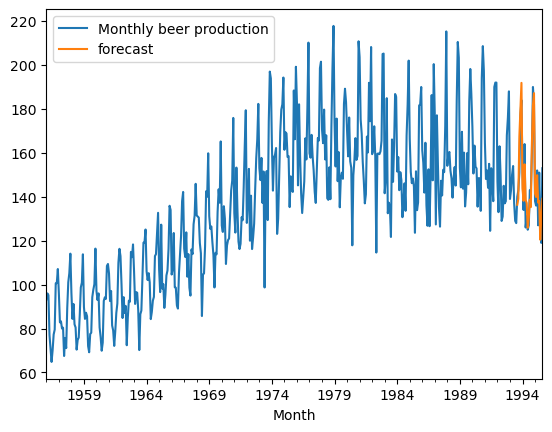

In [114]:
# Predict the given dataset (to split into train and test series)
dataset['forecast'] = result.predict(start=451, end=475, dynamic=True) # Last 2 Years
dataset[['Monthly beer production', 'forecast']].plot()
plt.show()

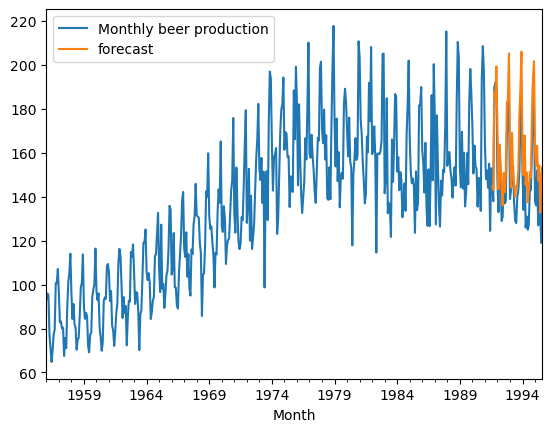

In [115]:
# Predict the given dataset (to split into train and test series)
dataset['forecast'] = result.predict(start=427, end=475, dynamic=True) # Last 4 years
dataset[['Monthly beer production', 'forecast']].plot()
plt.show()

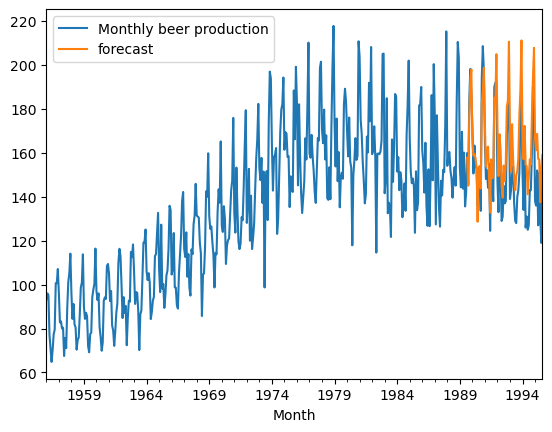

In [116]:
# Predict the given dataset (to split into train and test series)
dataset['forecast'] = result.predict(start=403, end=475, dynamic=True) # Last 6 years
dataset[['Monthly beer production', 'forecast']].plot()
plt.show()

# As we can see in respective above graphs for 2 years, 4 years and 6 years predictions are almost similar to actual data

In [117]:
# Predict 5 years monthly data

from pandas.tseries.offsets import DateOffset

In [118]:
dataset.tail()

,Monthly beer production,1st Diff,Seasonality,forecast
Month,,,,
1995-04-01,127.0,-25.0,1.0,157.277225
1995-05-01,151.0,24.0,20.0,157.009163
1995-06-01,130.0,-21.0,5.0,137.494452
1995-07-01,119.0,-11.0,-8.0,152.323906
1995-08-01,153.0,34.0,10.0,159.010048


In [119]:
future_dates = [dataset.index[-1] + DateOffset(months = x) for x in range(0,61)]

In [120]:
future_dates

[Timestamp('1995-08-01 00:00:00'),
 Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-01 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-01 00:00:00'),
 Timestamp('1996-06-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-01 00:00:00'),
 Timestamp('1996-09-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1996-11-01 00:00:00'),
 Timestamp('1996-12-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('1997-02-01 00:00:00'),
 Timestamp('1997-03-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-05-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('1997-08-01 00:00:00'),
 Timestamp('1997-09-01 00:00:00'),
 Timestamp('1997-10-01 00:00:00'),
 Timestamp('1997-11-01 00:00:00'),
 Timestamp('1997-12-

In [121]:
future_dates[1:]

[Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-10-01 00:00:00'),
 Timestamp('1995-11-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-01-01 00:00:00'),
 Timestamp('1996-02-01 00:00:00'),
 Timestamp('1996-03-01 00:00:00'),
 Timestamp('1996-04-01 00:00:00'),
 Timestamp('1996-05-01 00:00:00'),
 Timestamp('1996-06-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1996-08-01 00:00:00'),
 Timestamp('1996-09-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1996-11-01 00:00:00'),
 Timestamp('1996-12-01 00:00:00'),
 Timestamp('1997-01-01 00:00:00'),
 Timestamp('1997-02-01 00:00:00'),
 Timestamp('1997-03-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-05-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('1997-08-01 00:00:00'),
 Timestamp('1997-09-01 00:00:00'),
 Timestamp('1997-10-01 00:00:00'),
 Timestamp('1997-11-01 00:00:00'),
 Timestamp('1997-12-01 00:00:00'),
 Timestamp('1998-01-

In [122]:
future_dates_df = pd.DataFrame(index=future_dates[1:], columns = dataset.columns)

In [123]:
future_dates_df

,Monthly beer production,1st Diff,Seasonality,forecast
1995-09-01,NaN,NaN,NaN,NaN
1995-10-01,NaN,NaN,NaN,NaN
1995-11-01,NaN,NaN,NaN,NaN
1995-12-01,NaN,NaN,NaN,NaN
1996-01-01,NaN,NaN,NaN,NaN
1996-02-01,NaN,NaN,NaN,NaN
1996-03-01,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN
1996-05-01,NaN,NaN,NaN,NaN
1996-06-01,NaN,NaN,NaN,NaN


In [124]:
# append both the table (original table and forecasting table)
future_df = pd.concat([dataset, future_dates_df])

In [125]:
future_df

,Monthly beer production,1st Diff,Seasonality,forecast
1956-01-01,93.2,NaN,NaN,NaN
1956-02-01,96.0,2.8,NaN,NaN
1956-03-01,95.2,-0.8,NaN,NaN
1956-04-01,77.1,-18.1,NaN,NaN
1956-05-01,70.9,-6.2,NaN,NaN
...,...,...,...,...
2000-04-01,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN
2000-06-01,NaN,NaN,NaN,NaN
2000-07-01,NaN,NaN,NaN,NaN


In [126]:
len(future_df)

536

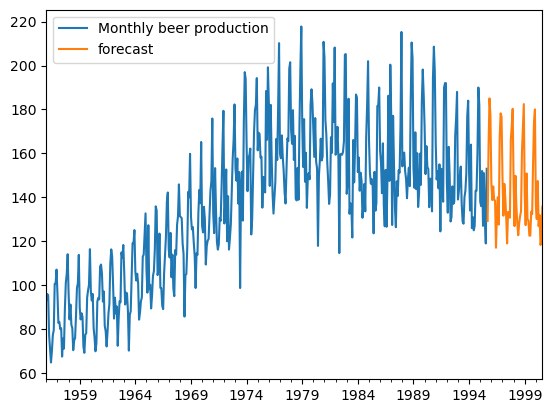

In [127]:
future_df['forecast'] = result.predict(start=476, end=536, dynamic=True)
future_df[['Monthly beer production','forecast']].plot()
plt.show()

In [129]:
future_df.tail(60)

,Monthly beer production,1st Diff,Seasonality,forecast
1995-09-01,NaN,NaN,NaN,129.229152
1995-10-01,NaN,NaN,NaN,163.884091
1995-11-01,NaN,NaN,NaN,185.052520
1995-12-01,NaN,NaN,NaN,177.276893
1996-01-01,NaN,NaN,NaN,146.329924
1996-02-01,NaN,NaN,NaN,138.778239
1996-03-01,NaN,NaN,NaN,144.959808
1996-04-01,NaN,NaN,NaN,138.816968
1996-05-01,NaN,NaN,NaN,138.514987
1996-06-01,NaN,NaN,NaN,117.058736


In [130]:
future_df.to_csv("5Year_Forecasting_beer_australia.csv")

# The End